In [266]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams["figure.figsize"]=(12,8)

In [267]:
df=pd.read_csv("movies.csv")
df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0


In [268]:
df.shape

(7668, 15)

In [269]:
for i in df.columns:
    pct_missing=np.mean(df[i].isnull())
    print(i,"-",pct_missing)

name - 0.0
rating - 0.010041731872717789
genre - 0.0
year - 0.0
released - 0.0002608242044861763
score - 0.0003912363067292645
votes - 0.0003912363067292645
director - 0.0
writer - 0.0003912363067292645
star - 0.00013041210224308815
country - 0.0003912363067292645
budget - 0.2831246739697444
gross - 0.02464788732394366
company - 0.002217005738132499
runtime - 0.0005216484089723526


In [270]:
# Create Correct Year Column

In [271]:
#check the type of columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [272]:
#Released column contains the correct value of year.
#Split the year value from df["released"] and assign to new_column

df["released"]

0          June 13, 1980 (United States)
1           July 2, 1980 (United States)
2          June 20, 1980 (United States)
3           July 2, 1980 (United States)
4          July 25, 1980 (United States)
                      ...               
7663    October 23, 2020 (United States)
7664    February 7, 2020 (United States)
7665           April 27, 2020 (Cameroon)
7666     October 1, 2020 (United States)
7667     August 19, 2020 (United States)
Name: released, Length: 7668, dtype: object

In [301]:
#Check if duplicated values exists

df.duplicated().value_counts()

False    7668
dtype: int64

In [273]:
#Check if nan values exists

df["released"].isnull().value_counts()

False    7666
True        2
Name: released, dtype: int64

In [274]:
#Replace nan values in "released" column with values that in "year" column

na_years=df[df["released"].isnull()]["year"]
df["released"].fillna(na_years,inplace=True)

In [275]:
#check if nan values filled 

df["released"].isnull().value_counts()

False    7668
Name: released, dtype: int64

In [238]:
# Change the data type to str of "released" column
df["released"]=df["released"].astype(str)

In [276]:
df["released"]

0          June 13, 1980 (United States)
1           July 2, 1980 (United States)
2          June 20, 1980 (United States)
3           July 2, 1980 (United States)
4          July 25, 1980 (United States)
                      ...               
7663    October 23, 2020 (United States)
7664    February 7, 2020 (United States)
7665           April 27, 2020 (Cameroon)
7666     October 1, 2020 (United States)
7667     August 19, 2020 (United States)
Name: released, Length: 7668, dtype: object

In [283]:
def released_year(year):
    if type(year)==str:
        for year_ in year.split(" "):
            try:
                return int(year_)
            except:
                pass
    else:
        return int(year)

In [284]:
df["year_corrected"]=df["released"].apply(released_year)

In [294]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [296]:
df.sort_values(by="gross",ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,2020


In [298]:
df.sort_values(by="score",ascending=False).head(20)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
2443,The Shawshank Redemption,R,Drama,1994,"October 14, 1994 (United States)",9.3,2400000.0,Frank Darabont,Stephen King,Tim Robbins,United States,25000000.0,2.881729e+07,Castle Rock Entertainment,142.0,1994
5243,The Dark Knight,PG-13,Action,2008,"July 18, 2008 (United States)",9.0,2400000.0,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,185000000.0,1.005974e+09,Warner Bros.,152.0,2008
2247,Schindler's List,R,Biography,1993,"February 4, 1994 (United States)",8.9,1200000.0,Steven Spielberg,Thomas Keneally,Liam Neeson,United States,22000000.0,3.221612e+08,Universal Pictures,195.0,1994
2444,Pulp Fiction,R,Crime,1994,"October 14, 1994 (United States)",8.9,1900000.0,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8000000.0,2.139288e+08,Miramax,154.0,1994
4245,The Lord of the Rings: The Return of the King,PG-13,Action,2003,"December 17, 2003 (United States)",8.9,1700000.0,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,94000000.0,1.146031e+09,New Line Cinema,201.0,2003
5643,Inception,PG-13,Action,2010,"July 16, 2010 (United States)",8.8,2100000.0,Christopher Nolan,Christopher Nolan,Leonardo DiCaprio,United States,160000000.0,8.368370e+08,Warner Bros.,148.0,2010
3845,The Lord of the Rings: The Fellowship of the Ring,PG-13,Action,2001,"December 19, 2001 (United States)",8.8,1700000.0,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,93000000.0,8.976901e+08,New Line Cinema,178.0,2001
2445,Forrest Gump,PG-13,Drama,1994,"July 6, 1994 (United States)",8.8,1900000.0,Robert Zemeckis,Winston Groom,Tom Hanks,United States,55000000.0,6.782261e+08,Paramount Pictures,142.0,1994
3444,Fight Club,R,Drama,1999,"October 15, 1999 (United States)",8.8,1900000.0,David Fincher,Chuck Palahniuk,Brad Pitt,Germany,63000000.0,1.012097e+08,Fox 2000 Pictures,139.0,1999
4048,The Lord of the Rings: The Two Towers,PG-13,Action,2002,"December 18, 2002 (United States)",8.7,1500000.0,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,94000000.0,9.474951e+08,New Line Cinema,179.0,2002


In [318]:
## df2=df[~df["gross"].isnull() & ~df["budget"].isnull()]

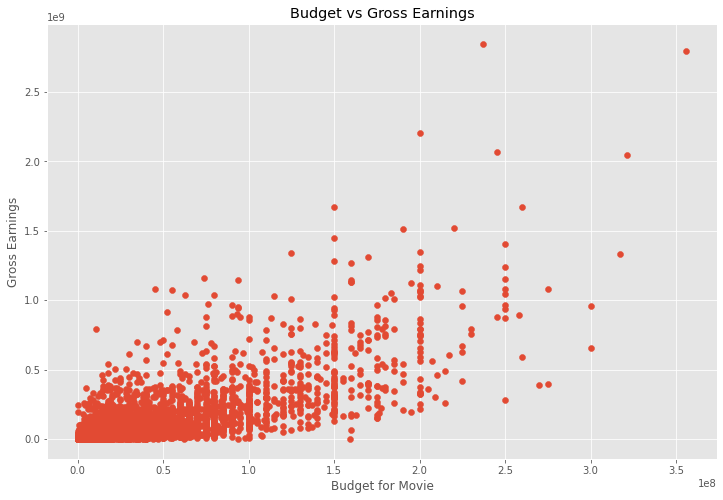

In [323]:
# Scatter plot with budget and gross

plt.scatter(x=df["budget"],y=df["gross"])

plt.title("Budget vs Gross Earnings")

plt.ylabel("Gross Earnings")
plt.xlabel("Budget for Movie")

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

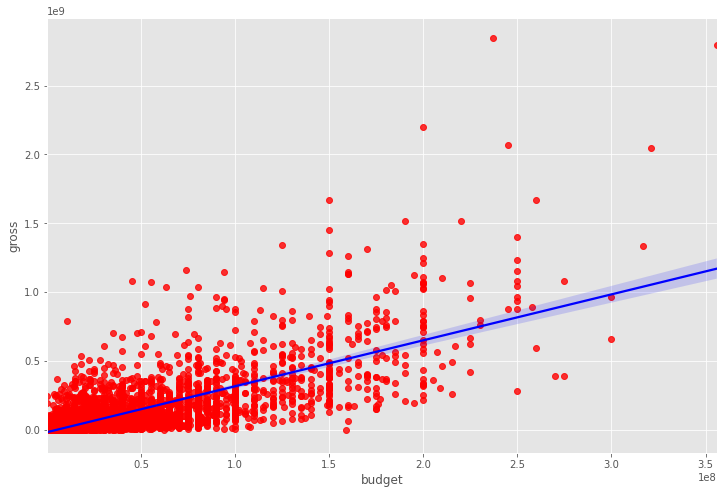

In [325]:
#Plot the Budget vs gross using seaborn

sns.regplot(x="budget",y="gross",data=df,scatter_kws={"color":"red"},
            line_kws={"color":"blue"})

### Correlation

In [328]:
#Correlation

df.corr()

,year,score,votes,budget,gross,runtime,year_corrected
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811,0.997416
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451,0.105821
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212,0.218422
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447,0.321918
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216,0.250514
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000,0.120636
year_corrected,0.997416,0.105821,0.218422,0.321918,0.250514,0.120636,1.000000


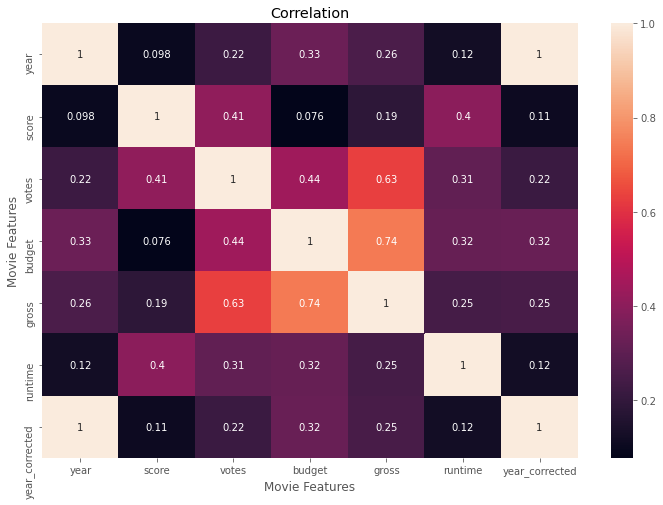

In [332]:
#Correlation viz with heatmap

sns.heatmap(df.corr(),annot=True)

plt.title("Correlation")

plt.ylabel("Movie Features")
plt.xlabel("Movie Features")

plt.show()

In [331]:
# 0.74 correlation between budget and gross